In [1078]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 


数据生成及预处理

In [1079]:
##生成服从正态分布的数据
np.random.seed(1)
weight = np.random.randn(100,1)
#b = 1
#print(weight)
data_x = np.random.randn(200,100)
#划分训练集和测试集
##x和y的切片要同步进行
#train_data为训练集，其中train_data_x1和train_data_x2用于交叉验证时的切片与合并处理
train_data_x1 = data_x[0:180,:]
train_data_x2 = data_x[200:200,:]
train_data_x = np.concatenate((train_data_x1,train_data_x2),axis=0) 
test_data_x = data_x[180:200,:]

#train_data_y和test_data_y为训练集和测试集的lable
noise = np.random.normal(loc =0.0 , scale= 0.01,size = (200,1))
data_truth_y = np.dot(data_x, weight) + noise
train_data_y1 = data_truth_y[0:180,:]
train_data_y2 = data_truth_y[200:200,:]
train_data_y = np.concatenate((train_data_y1,train_data_y2),axis=0) 
test_data_y = data_truth_y[180:200,:]


线性回归

In [1080]:
#初始化w，b
def initial(dim):
    w  = np.zeros((dim, 1))
    b = 0
    return w,b
    #print(w)
    #print(w.shape)##根据损失函数调试


In [1081]:
#设置损失函数，并根据梯度下降法计算出每次需要迭代的dw,db
def lossf(X, y, w, b,gama):
    num_of_data = X.shape[0]
    num_of_feature = X.shape[1]
    #print(X.shape)
    #print(w.shape)
    y_mat = np.dot(X, w)+b
    #损失函数
    loss1 = 0.5*gama*np.sum(w**2)
    loss2 = np.sum((y_mat-y)**2)
    loss_total = loss1+loss2
    #更新的dw，db
    #loss_mean = -loss_total/num_of_data
    dw = (gama*w + 2*np.dot(X.T, y-y_mat))/num_of_data
    db = 2* sum(y-y_mat)/num_of_data
    #print(loss_mean)
    #print(dw.shape)
    #print(db.shape)
    return y_mat, loss_total, dw, db
#w,b = initial(train_data_x.shape[1])
#logistics(train_data_x,train_data_y,w,b)

In [1082]:
#训练函数
def train(X, y, gama, learning_rate=0.001, epochs=10000):
    epochs_loss = []
    w,b = initial(X.shape[1])
    #print(w.shape)
    #根据设置的epoch进行循环
    for i in range(epochs):
        y_hat, loss, dw,db = lossf(X, y, w, b,gama)
        #更新w和b
        w += learning_rate*dw
        b += learning_rate*db
        epochs_loss.append(loss)
        #if(i%5000 ==0):
            #learning_rate = learning_rate/2.0
            #print(learning_rate)
    params = {'w':w, 'b':b}
    grades = {'dw':dw, 'db': db}
    return epochs_loss, params, grades

In [1083]:
#预测
def predict(X, params):
    w = params['w']
    
    b = params['b']
    y_pre = np.dot(X, w)+b
    return y_pre

[0.05895489]


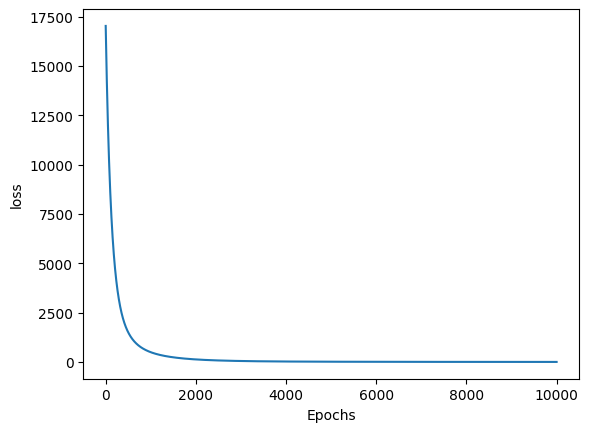

In [1084]:
##主函数
#调整下面超参数即可
learning_rate = 0.001
epochs = 10000
gama = 0.01
train_loss, params, grads = train(train_data_x,train_data_y, gama,learning_rate, epochs)

pre_train_data_y = predict(train_data_x, params)
pre_data_y = predict(test_data_x, params)
#做出损失函数和ephoch的图，验证收敛
ephochs_list = np.arange(0, ephochs,1)
train_loss = np.array(train_loss)
final_loss = train_loss[-1]
#print(final_loss)
plt.plot(ephochs_list, train_loss)
plt.xlabel('Epochs')
plt.ylabel('loss')
w = params['w']
#print(params['w'])
#计算最终损失函数
#loss = sum((pre_data_y-test_data_y)**2)+0.5*gama*np.sum(w**2)
#print(loss)
mse = sum((pre_data_y-test_data_y)**2)/pre_data_y.shape[0]
print(mse)
#计算w损失
#wloss = np.sum((weight-w)**2)/100
#print(wloss)